## Load Excel Files


In [ ]:
import pandas as pd

df_grand_database = pd.read_excel('/content/Grand Database editable.xlsx')
df_oem_landscape = pd.read_excel('/content/OEM Landscape editable.xlsx')

print('Grand Database:')
print(df_grand_database.head())
print('\nOEM Landscape:')
print(df_oem_landscape.head())

Grand Database:
   Unnamed: 0    Unnamed: 1 Unnamed: 2
0         NaN           NaN        NaT
1         NaN  CONFIDENTIAL        NaT
2         NaN           NaN        NaT
3         NaN           NaN        NaT
4         NaN           NaN        NaT

OEM Landscape:
   Unnamed: 0    Unnamed: 1 Unnamed: 2
0         NaN           NaN        NaT
1         NaN  CONFIDENTIAL        NaT
2         NaN           NaN        NaT
3         NaN           NaN        NaT
4         NaN           NaN        NaT




```python
import pandas as pd

# Reload the Excel files without a header
df_grand_database_raw = pd.read_excel('/content/Grand Database editable.xlsx', header=None)
df_oem_landscape_raw = pd.read_excel('/content/OEM Landscape editable.xlsx', header=None)

print("--- Identifying Header for Grand Database ---")
header_grand_database_candidate_row = -1
max_non_nulls_grand = -1

for i in range(min(50, len(df_grand_database_raw))): # Check up to the first 50 rows
    row_data = df_grand_database_raw.iloc[i]
    non_null_count = row_data.count()
    if non_null_count > max_non_nulls_grand:
        max_non_nulls_grand = non_null_count
        header_grand_database_candidate_row = i
    print(f"Row {i}: Non-null count = {non_null_count}")
    if non_null_count > 1: # Print row content if it has more than 1 non-null value
        print(f"  Content: {row_data.dropna().tolist()}")

print(f"\nPotential header row for Grand Database: Row {header_grand_database_candidate_row} with {max_non_nulls_grand} non-null values.")


print("\n--- Identifying Header for OEM Landscape ---")
header_oem_landscape_candidate_row = -1
max_non_nulls_oem = -1

for i in range(min(50, len(df_oem_landscape_raw))): # Check up to the first 50 rows
    row_data = df_oem_landscape_raw.iloc[i]
    non_null_count = row_data.count()
    if non_null_count > max_non_nulls_oem:
        max_non_nulls_oem = non_null_count
        header_oem_landscape_candidate_row = i
    print(f"Row {i}: Non-null count = {non_null_count}")
    if non_null_count > 1: # Print row content if it has more than 1 non-null value
        print(f"  Content: {row_data.dropna().tolist()}")

print(f"\nPotential header row for OEM Landscape: Row {header_oem_landscape_candidate_row} with {max_non_nulls_oem} non-null values.")

```

## Load Excel Sheet Names




In [ ]:
excel_grand_database = pd.ExcelFile('/content/Grand Database editable.xlsx')
sheets_grand_database = excel_grand_database.sheet_names
print('Sheets in Grand-Database-Master-JADS.xlsx:')
print(sheets_grand_database)

excel_oem_landscape = pd.ExcelFile('/content/OEM Landscape editable.xlsx')
sheets_oem_landscape = excel_oem_landscape.sheet_names
print('\nSheets in OEM-Landscape-Master-JADS.xlsx:')
print(sheets_oem_landscape)

Sheets in Grand-Database-Master-JADS.xlsx:
['INTRO', 'INSTRUCTIONS', 'GranDatabase_2022', 'GrandMatrix', 'Definitions']

Sheets in OEM-Landscape-Master-JADS.xlsx:
['INTRO', 'DB-OEM', 'Def. Columns', 'M&A', 'Definitions', 'Blad3']


### Identified Relevant Sheets

**Grand-Database-Master-JADS.xlsx**

*   **Relevant Sheets:** `['GranDatabase_2022', 'GrandMatrix']`
*   **Justification:**
    *   `'GranDatabase_2022'` and `'GrandMatrix'` sound like primary data sources. `GranDatabase_2022` suggests a dataset for a specific year, and `GrandMatrix` implies structured data in a matrix format.
    *   `'INTRO'`, `'INSTRUCTIONS'`, and `'Definitions'` are excluded as they are clearly for introductory, instructional, or definitional purposes, not raw data.

**OEM-Landscape-Master-JADS.xlsx**

*   **Relevant Sheets:** `['DB-OEM', 'M&A']`
*   **Justification:**
    *   `'DB-OEM'` strongly suggests a database related to OEM (Original Equipment Manufacturer) data, making it highly relevant. `'M&A'` indicates data related to Mergers & Acquisitions, which is likely transactional or strategic data.
    *   `'INTRO'`, `'Def. Columns'`, and `'Definitions'` are excluded for similar reasons as the Grand Database file (introductory or definitional content). `'Blad3'` is a generic sheet name that typically does not contain relevant structured data and is therefore excluded.

## Load Relevant Sheets (without header)




In [ ]:
file_path_grand_database = '/content/Grand Database editable.xlsx'
file_path_oem_landscape = '/content/OEM Landscape editable.xlsx'

df_grand_db_2022_raw = pd.read_excel(file_path_grand_database, sheet_name='GranDatabase_2022', header=None)
df_grand_matrix_raw = pd.read_excel(file_path_grand_database, sheet_name='GrandMatrix', header=None)
df_oem_db_raw = pd.read_excel(file_path_oem_landscape, sheet_name='DB-OEM', header=None)
df_oem_ma_raw = pd.read_excel(file_path_oem_landscape, sheet_name='M&A', header=None)

print('df_grand_db_2022_raw Head:')
print(df_grand_db_2022_raw.head())
print('\ndf_grand_matrix_raw Head:')
print(df_grand_matrix_raw.head())
print('\ndf_oem_db_raw Head:')
print(df_oem_db_raw.head())
print('\ndf_oem_ma_raw Head:')
print(df_oem_ma_raw.head())

df_grand_db_2022_raw Head:
           0                1                 2         3   \
0     Segment      OEM Account  Segment category   Variety   
1  Plantbased  Cantrell-GainCo        Plantbased  Agnostic   
2     Poultry  Cantrell-GainCo          Beverage   Chicken   
3  Plantbased  Cantrell-GainCo        Plantbased  Agnostic   
4     Poultry  Cantrell-GainCo             Dairy  Agnostic   

                     4              5        6              7   \
0  Species group l sort  Species class  Country      Continent   
1              Agnostic       Agnostic       US  North America   
2               Chicken        Chicken       US  North America   
3              Agnostic       Agnostic       US  North America   
4              Agnostic       Agnostic       US  North America   

                        8                       9   ...  \
0  Processing Category No.     Processing Category  ...   
1                        3  3 Secondary processing  ...   
2                        3

## Identify Header Row per Sheet




--- Identifying Header for df_grand_db_2022_raw ---
Row 0: Non-null count = 37
  Content: ['Segment', 'OEM Account', 'Segment category', 'Variety', 'Species group l sort', 'Species class', 'Country', 'Continent', 'Processing Category No.', 'Processing Category', 'Processing step', 'Processing step no.', 'Product', 'Product type', 'Product size', 'Throughput', 'Operators', 'Est. price (EUR)', 'Sales strategy', 'Technology level', 'Design sophistication', 'Build quality', 'Unique Selling Point', 'Est. no. Installed base', 'Market Growth Rate', 'Relative Market Share', 'Strategic partner', 'Differentiator product', 'Software l automation', 'MES connection', 'Layout Design', 'Full line l Niche', 'Note', 'Info', 'Url', 'Video', 'Last Update']
Row 1: Non-null count = 22
  Content: ['Plantbased', 'Cantrell-GainCo', 'Plantbased', 'Agnostic', 'Agnostic', 'Agnostic', 'US', 'North America', 3, '3 Secondary processing', 'Weighing & grading', '014 Weighing & grading', ' AccuSizer belt grader', 'in
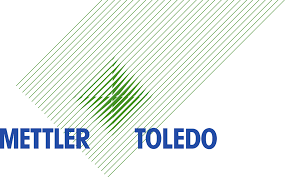
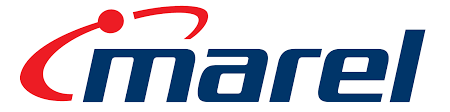
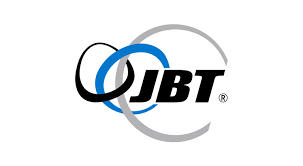
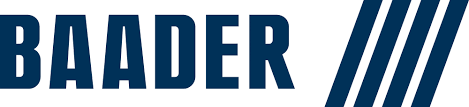
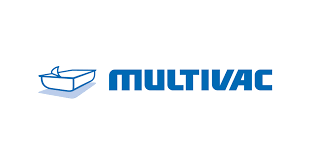
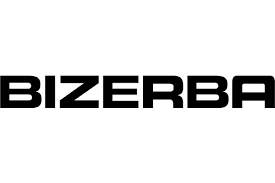
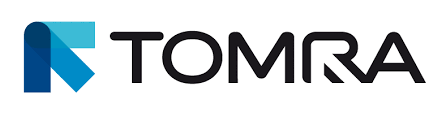

In [ ]:
def identify_header_row(df, df_name):
    print(f"\n--- Identifying Header for {df_name} ---")
    header_candidate_row = -1
    max_non_nulls = -1

    # Check up to the first 10 rows
    for i in range(min(10, len(df))):
        row_data = df.iloc[i]
        non_null_count = row_data.count()
        print(f"Row {i}: Non-null count = {non_null_count}")
        if non_null_count > 0:
            print(f"  Content: {row_data.dropna().tolist()}")

        if non_null_count > max_non_nulls:
            max_non_nulls = non_null_count
            header_candidate_row = i

    print(f"Potential header row for {df_name}: Row {header_candidate_row} with {max_non_nulls} non-null values.")
    return header_candidate_row


header_grand_db_2022 = identify_header_row(df_grand_db_2022_raw, 'df_grand_db_2022_raw')
header_grand_matrix = identify_header_row(df_grand_matrix_raw, 'df_grand_matrix_raw')
header_oem_db = identify_header_row(df_oem_db_raw, 'df_oem_db_raw')
header_oem_ma = identify_header_row(df_oem_ma_raw, 'df_oem_ma_raw')


In [ ]:
file_path_grand_database = '/content/Grand Database editable.xlsx'
file_path_oem_landscape = '/content/OEM Landscape editable.xlsx'

df_grand_db_2022 = pd.read_excel(file_path_grand_database, sheet_name='GranDatabase_2022', header=header_grand_db_2022)

df_grand_matrix = pd.read_excel(file_path_grand_database, sheet_name='GrandMatrix', header=header_grand_matrix)

df_oem_db = pd.read_excel(file_path_oem_landscape, sheet_name='DB-OEM', header=header_oem_db)

df_oem_ma = pd.read_excel(file_path_oem_landscape, sheet_name='M&A', header=header_oem_ma)

print('df_grand_db_2022 Head:')
print(df_grand_db_2022.head())
print('\ndf_grand_matrix Head:')
print(df_grand_matrix.head())
print('\ndf_oem_db Head:')
print(df_oem_db.head())
print('\ndf_oem_ma Head:')
print(df_oem_ma.head())

df_grand_db_2022 Head:
      Segment      OEM Account Segment category   Variety  \
0  Plantbased  Cantrell-GainCo       Plantbased  Agnostic   
1     Poultry  Cantrell-GainCo         Beverage   Chicken   
2  Plantbased  Cantrell-GainCo       Plantbased  Agnostic   
3     Poultry  Cantrell-GainCo            Dairy  Agnostic   
4  Plantbased       Cabinplant             Meat  Agnostic   

  Species group l sort Species class      Country      Continent  \
0             Agnostic      Agnostic           US  North America   
1              Chicken       Chicken           US  North America   
2             Agnostic      Agnostic           US  North America   
3             Agnostic      Agnostic           US  North America   
4             Agnostic      Agnostic  Netherlands         Europe   

   Processing Category No.     Processing Category  ...  \
0                      3.0  3 Secondary processing  ...   
1                      3.0  3 Secondary processing  ...   
2                      3

In [ ]:
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)
    return df

df_grand_db_2022 = clean_column_names(df_grand_db_2022)
df_grand_matrix = clean_column_names(df_grand_matrix)
df_oem_db = clean_column_names(df_oem_db)
df_oem_ma = clean_column_names(df_oem_ma)

print('Cleaned df_grand_db_2022 columns:')
print(df_grand_db_2022.columns.tolist())
print('\nCleaned df_grand_matrix columns:')
print(df_grand_matrix.columns.tolist())
print('\nCleaned df_oem_db columns:')
print(df_oem_db.columns.tolist())
print('\nCleaned df_oem_ma columns:')
print(df_oem_ma.columns.tolist())

Cleaned df_grand_db_2022 columns:
['segment', 'oem_account', 'segment_category', 'variety', 'species_group_l_sort', 'species_class', 'country', 'continent', 'processing_category_no', 'processing_category', 'processing_step', 'processing_step_no', 'product', 'product_type', 'product_size', 'throughput', 'operators', 'est_price_eur', 'sales_strategy', 'technology_level', 'design_sophistication', 'build_quality', 'unique_selling_point', 'est_no_installed_base', 'market_growth_rate', 'relative_market_share', 'strategic_partner', 'differentiator_product', 'software_l_automation', 'mes_connection', 'layout_design', 'full_line_l_niche', 'note', 'info', 'url', 'video', 'last_update']

Cleaned df_grand_matrix columns:
['industry', 'fph_oem_category', 'lc_report_categories_no', 'lc_report_categories', 'processing_category_no', 'processing_category', 'processing_step', 'no', 'processing_step_no', 'processing_step_no1', 'unnamed_10']

Cleaned df_oem_db columns:
['reported', 'no_', 'account', 'key_

In [ ]:
if 'unnamed_10' in df_grand_matrix.columns:
    df_grand_matrix = df_grand_matrix.drop(columns=['unnamed_10'])
    print("Dropped 'unnamed_10' column from df_grand_matrix.")
else:
    print("'unnamed_10' column not found in df_grand_matrix.")

print('\nUpdated df_grand_matrix columns:')
print(df_grand_matrix.columns.tolist())

Dropped 'unnamed_10' column from df_grand_matrix.

Updated df_grand_matrix columns:
['industry', 'fph_oem_category', 'lc_report_categories_no', 'lc_report_categories', 'processing_category_no', 'processing_category', 'processing_step', 'no', 'processing_step_no', 'processing_step_no1']


In [ ]:
print(f"Number of duplicate rows in df_grand_db_2022: {df_grand_db_2022.duplicated().sum()}")
print(f"Number of duplicate rows in df_grand_matrix: {df_grand_matrix.duplicated().sum()}")
print(f"Number of duplicate rows in df_oem_db: {df_oem_db.duplicated().sum()}")
print(f"Number of duplicate rows in df_oem_ma: {df_oem_ma.duplicated().sum()}")

Number of duplicate rows in df_grand_db_2022: 287
Number of duplicate rows in df_grand_matrix: 1797
Number of duplicate rows in df_oem_db: 0
Number of duplicate rows in df_oem_ma: 0


In [ ]:
df_grand_db_2022 = df_grand_db_2022.drop_duplicates()
df_grand_matrix = df_grand_matrix.drop_duplicates()

print(f"Number of duplicate rows in df_grand_db_2022 after dropping: {df_grand_db_2022.duplicated().sum()}")
print(f"Number of duplicate rows in df_grand_matrix after dropping: {df_grand_matrix.duplicated().sum()}")

Number of duplicate rows in df_grand_db_2022 after dropping: 0
Number of duplicate rows in df_grand_matrix after dropping: 0


## Inspect and Prepare Data



In [ ]:
print('--- df_grand_db_2022 Description ---')
print(df_grand_db_2022.describe(include='all'))

print('\n--- df_grand_matrix Description ---')
print(df_grand_matrix.describe(include='all'))

print('\n--- df_oem_db Description ---')
print(df_oem_db.describe(include='all'))

print('\n--- df_oem_ma Description ---')
print(df_oem_ma.describe(include='all'))

--- df_grand_db_2022 Description ---
       segment                             oem_account segment_category  \
count    24653                                   24652            23521   
unique      10                                     320               74   
top       Meat  Imperial Commercial Cooking Equipment.         Agnostic   
freq      4841                                    1206             3976   
mean       NaN                                     NaN              NaN   
std        NaN                                     NaN              NaN   
min        NaN                                     NaN              NaN   
25%        NaN                                     NaN              NaN   
50%        NaN                                     NaN              NaN   
75%        NaN                                     NaN              NaN   
max        NaN                                     NaN              NaN   

         variety species_group_l_sort species_class  country c

In [ ]:
import numpy as np
import pandas as pd

# Columns for df_grand_db_2022
df_grand_db_2022['text'] = df_grand_db_2022.apply(
    lambda row: ' '.join(str(row[col]) for col in [
        'segment', 'oem_account', 'segment_category', 'variety', 'species_group_l_sort',
        'species_class', 'country', 'continent', 'processing_category', 'processing_step',
        'product', 'product_type', 'unique_selling_point', 'info', 'url', 'note',
        'differentiator_product', 'software_l_automation', 'mes_connection', 'layout_design', 'full_line_l_niche'
    ] if str(row[col]) != 'nan'), axis=1
)

# Columns for df_grand_matrix
df_grand_matrix['text'] = df_grand_matrix.apply(
    lambda row: ' '.join(str(row[col]) for col in [
        'industry', 'fph_oem_category', 'lc_report_categories', 'processing_category', 'processing_step'
    ] if str(row[col]) != 'nan'), axis=1
)

# Columns for df_oem_db
df_oem_db['text'] = df_oem_db.apply(
    lambda row: ' '.join(str(row[col]) for col in [
        'account', 'key_words', 'parent_company', 'strategic_partner', 'strategic_group',
        'strategic_partnership_type', 'type_public_or_private', 'company_information__focus_area',
        'headquarter_location', 'segmentation_in_competitive_quadrant', 'comments'
    ] if str(row[col]) != 'nan'), axis=1
)

# Columns for df_oem_ma
df_oem_ma['text'] = df_oem_ma.apply(
    lambda row: ' '.join(str(row[col]) for col in [
        'buying_party', 'selling_party_partner', 'type', 'industry__segment',
        'description_of_acquisition', 'comment', 'url_link'
    ] if str(row[col]) != 'nan'), axis=1
)

print("Created 'text' columns for all relevant DataFrames. Displaying head of the new 'text' columns:")
print('\ndf_grand_db_2022["text"].head():')
print(df_grand_db_2022['text'].head())
print('\ndf_grand_matrix["text"].head():')
print(df_grand_matrix['text'].head())
print('\ndf_oem_db["text"].head():')
print(df_oem_db['text'].head())
print('\ndf_oem_ma["text"].head():')
print(df_oem_ma['text'].head())

Created 'text' columns for all relevant DataFrames. Displaying head of the new 'text' columns:

df_grand_db_2022["text"].head():
0    Plantbased Cantrell-GainCo Plantbased Agnostic...
1    Poultry Cantrell-GainCo Beverage Chicken Chick...
2    Plantbased Cantrell-GainCo Plantbased Agnostic...
3    Poultry Cantrell-GainCo Dairy Agnostic Agnosti...
4    Plantbased Cabinplant Meat Agnostic Agnostic A...
Name: text, dtype: object

df_grand_matrix["text"].head():
0    Bakery 1 Primary processing, live handling, by...
1    Bakery 1 Primary processing, live handling, by...
2    Bakery 1 Primary processing, live handling, by...
3    Bakery 1 Primary processing, live handling, by...
4    Bakery 1 Primary processing, live handling, by...
Name: text, dtype: object

df_oem_db["text"].head():
0    Gea Food FP, Software, pizza Gea Food GEA Grou...
1    Mettler Toledo Food Poultry, Meat, Seafood, So...
2    Marel Poutry, Meat, Seafood, FP, Software Mare...
3    JBT Food Tech FP, Software, pizza FMC T

In [ ]:
combined_text_data = pd.concat([
    df_grand_db_2022['text'],
    df_grand_matrix['text'],
    df_oem_db['text'],
    df_oem_ma['text']
], ignore_index=True)

df_chatbot_data = pd.DataFrame({'text': combined_text_data})

print('Combined Chatbot Data Head:')
print(df_chatbot_data.head())
print(f'Total rows in combined chatbot data: {len(df_chatbot_data)}')


Combined Chatbot Data Head:
                                                text
0  Plantbased Cantrell-GainCo Plantbased Agnostic...
1  Poultry Cantrell-GainCo Beverage Chicken Chick...
2  Plantbased Cantrell-GainCo Plantbased Agnostic...
3  Poultry Cantrell-GainCo Dairy Agnostic Agnosti...
4  Plantbased Cabinplant Meat Agnostic Agnostic A...
Total rows in combined chatbot data: 26675


**STOP**

In [ ]:
get_ipython().system('pip install transformers torch accelerate peft bitsandbytes trl')
print("Installed required libraries for model loading and fine-tuning.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 18.8 MB/s eta 0:00:00
Installed required libraries for model loading and fine-tuning.


In [ ]:
get_ipython().system('pip install transformers torch accelerate peft bitsandbytes trl')
print("Installed required libraries for model loading and fine-tuning.")

Installed required libraries for model loading and fine-tuning.


## Load Pre-trained Phi-2 Model and Tokenizer




In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "microsoft/phi-2"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
)

tokenizer = AutoTokenizer.from_pretrained(model_name, add_eos_token=True, trust_remote_code=True)

tokenizer.pad_token = tokenizer.eos_token

print("Phi-2 model and tokenizer loaded successfully with 4-bit quantization.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Phi-2 model and tokenizer loaded successfully with 4-bit quantization.


In [ ]:
from datasets import Dataset

# Convert the pandas DataFrame to a Hugging Face Dataset
chatbot_dataset = Dataset.from_pandas(df_chatbot_data)

print("Chatbot data successfully converted to Hugging Face Dataset.")
print(chatbot_dataset)
print(chatbot_dataset[0])

Chatbot data successfully converted to Hugging Face Dataset.
Dataset({
    features: ['text'],
    num_rows: 26675
})
{'text': 'Plantbased Cantrell-GainCo Plantbased Agnostic Agnostic Agnostic US North America 3 Secondary processing Weighing & grading  AccuSizer belt grader in-line https://cantrellgainco.com/equipment/weighing-packaging/accusizer-belt-graders-classifiers full line'}


In [ ]:
def tokenize_function(examples):
    # Ensure each example is a string to avoid tokenization errors
    return tokenizer(examples['text'], truncation=True, max_length=512)

# Apply the tokenization function to the dataset
tokenized_dataset = chatbot_dataset.map(tokenize_function, batched=True, remove_columns=['text'])

print("Chatbot dataset successfully tokenized.")
print(tokenized_dataset)
print(tokenized_dataset[0])

Map:   0%|          | 0/26675 [00:00<?, ? examples/s]

Chatbot dataset successfully tokenized.
Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 26675
})
{'input_ids': [3646, 415, 3106, 16821, 11252, 12, 38, 391, 7222, 16561, 3106, 2449, 43758, 2449, 43758, 2449, 43758, 1294, 2258, 2253, 513, 29521, 7587, 775, 394, 278, 1222, 43165, 50286, 17320, 84, 50, 7509, 10999, 3915, 263, 287, 12, 1370, 3740, 1378, 66, 415, 11252, 48544, 1073, 13, 785, 14, 4853, 4667, 14, 732, 394, 278, 12, 8002, 3039, 14, 4134, 385, 7509, 12, 37976, 12, 9744, 364, 12, 4871, 13350, 1336, 1627], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## Fine-tune the Model




In [ ]:
from trl import SFTTrainer
from peft import LoraConfig
from transformers import TrainingArguments

# 2. Define LoRA configuration
peft_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
)

# 3. Define training arguments
training_arguments = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=1,
    optim="paged_adamw_32bit",
    save_steps=100,
    logging_steps=100,
    learning_rate=2e-4,
    weight_decay=0.001,
    fp16=False,
    bf16=False,
    max_grad_norm=0.3,
    max_steps=-1,
    warmup_ratio=0.03,
    group_by_length=True,
    lr_scheduler_type="cosine",
    report_to="tensorboard",
)

# 4. Initialize SFTTrainer
trainer = SFTTrainer(
    model=model,
    train_dataset=tokenized_dataset,
    peft_config=peft_config,
    args=training_arguments,
)

# 5. Start the fine-tuning process
trainer.train()

# 6. Save the fine-tuned model and tokenizer
output_dir = "./phi-2-finetuned"
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Fine-tuned model and tokenizer saved to {output_dir}")

Truncating train dataset:   0%|          | 0/26675 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


## Test the Chatbot

